## Pandas. Your turn

In this Notebook you are going to use this small data set to hone your Pandas skills based on the return indexes of Apple and the S&P 500 index. The idea is to estimate a simple market model and test for significance of the beta coefficient. 

Feel free to play around. You can add cells to experiment. But please try all the assignments, and use the proper variable names if they are mentioned.

## Setup

First things first. You have to import the right modules. In the next cell, import `Pandas` and matplotlib's `pyplot` like you have seen in the other Notebook. Don't forget to run the cell.

In [1]:
# import the Pandas and pyplot modules here, use aliases pd and plt
import pandas as pd
import matplotlib.pyplot as plt

# you need this module as well to handle dates
import datetime as dt

# and this line will render all plots into our Notebook
%matplotlib inline

To enlarge the plot-size you need a special call on matplotlib's pyplot. Find it in the other Notebook and copy-paste below. Run it.

In [3]:
# set figure size for images in our Notebook
plt.rcParams['figure.figsize'] = [9, 7]

## Imports

[Import the CSV file](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) `Apple return index.csv` from the data folder into a DataFrame and assign it to the variable `apple_ri`. It contains dates and return indexes. Check Apple return index.csv first before opening it in Pandas. What kind of separator is used? Use this information in your import call. 

There is another problem: the dates! These are strings, and need to be converted into proper Python dates. Check which argument deals with this problem. Besides that, set the `infer_datetime_format`-argument to True in your import call. This will ensure, and speed up, a proper date conversion. When you're done with importing check the first 10 lines of your DataFrame with the `head` function.

In [7]:
# reading the csv, index_col=0 sets the date in the index
# parse_dates = 'dates' - the dates are strings, and need to be converted into proper Python dates
apple_ri = pd.read_csv('data/Apple return index.csv', parse_dates=['date'], infer_datetime_format = True)
apple_ri.head(10)

,date,APPLE - TOT RETURN IND
0,2000-12-31,226.75
1,2001-01-31,329.65
2,2001-02-28,278.20
3,2001-03-30,336.44
4,2001-04-30,388.57
5,2001-05-31,304.12
6,2001-06-29,354.42
7,2001-07-31,286.43
8,2001-08-31,282.78
9,2001-09-28,236.43


Import from the data folder the 'S&P500 return index.xlsx' file as well and assign it to `sp500_ri`. Read the 7 last lines with the `tail` function.

In [8]:
# reading the S&P500 excel
sp500_ri = pd.read_excel('data/S&P500 return index.xlsx')
sp500_ri.tail(10)

,date,S&P 500 COMPOSITE - TOT RETURN IND
207,2018-03-30,5173.19
208,2018-04-30,5193.04
209,2018-05-31,5318.10
210,2018-06-29,5350.83
211,2018-07-31,5549.96
212,2018-08-31,5730.80
213,2018-09-28,5763.42
214,2018-10-31,5369.49
215,2018-11-30,5478.91
216,2018-12-31,4984.22


## Merge

[Merge both DataFrames into 1 DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) `df`. Use the `date` column as merge-key. Check the last 15 rows to see if your merging was done correctly.

In [9]:
# merging dataframes apple_ri and sp500_ri on the column date
df = apple_ri.merge(sp500_ri, how='left', on='date')

df.tail(15)

,date,APPLE - TOT RETURN IND,S&P 500 COMPOSITE - TOT RETURN IND
202,2017-10-31,40102.16,5002.03
203,2017-11-30,40915.84,5155.44
204,2017-12-29,40292.04,5212.76
205,2018-01-31,39863.48,5511.21
206,2018-02-28,42579.48,5308.09
207,2018-03-30,40107.71,5173.19
208,2018-04-30,39505.31,5193.04
209,2018-05-31,44844.08,5318.10
210,2018-06-29,44421.73,5350.83
211,2018-07-31,45664.79,5549.96


In [10]:
# run this cell to check your code
assert set(df.columns)==set(['date', 'APPLE - TOT RETURN IND', 'S&P 500 COMPOSITE - TOT RETURN IND']), 'Your merge table is not correct'
assert len(df)==217, 'The amount of rows is not correct'

## Returns

Let's calculate the returns as the simple percentage change of the return indexes. Follow the example given for Apple. If you are interested in what the `shift` function does: [check this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html).
    
Finally, drop the first row of the dataframe that now contains `NaN` due the first differences. 

In [17]:
#shift function pushes cells downward - applicable here because its time series 
df['return_apple'] = (df['APPLE - TOT RETURN IND'] - df['APPLE - TOT RETURN IND'].shift(1))/df['APPLE - TOT RETURN IND'].shift(1) * 100

#Add a column with the returns of the S&P
df['return_sp500'] = (df['S&P 500 COMPOSITE - TOT RETURN IND'] - df['S&P 500 COMPOSITE - TOT RETURN IND'].shift(1))/df['S&P 500 COMPOSITE - TOT RETURN IND'].shift(1) * 100

# drop the NaN valuesL
df = df.dropna()

# show df to check if all is well:
df.head(n=30)

,date,APPLE - TOT RETURN IND,S&P 500 COMPOSITE - TOT RETURN IND,return_apple,return_sp500
1,2001-01-31,329.65,1902.55,45.380375,3.548025
2,2001-02-28,278.20,1729.07,-15.607462,-9.118289
3,2001-03-30,336.44,1619.54,20.934579,-6.334619
4,2001-04-30,388.57,1745.39,15.494590,7.770725
5,2001-05-31,304.12,1757.09,-21.733536,0.670337
6,2001-06-29,354.42,1714.32,16.539524,-2.434138
7,2001-07-31,286.43,1697.44,-19.183455,-0.984647
8,2001-08-31,282.78,1591.18,-1.274308,-6.260015
9,2001-09-28,236.43,1462.69,-16.390834,-8.075139
10,2001-10-31,267.68,1490.58,13.217443,1.906761


## iloc

Let's practice with `iloc`. Select the 140th to the 150th (including) row from the `return_apple` column. Assign to the variable `selection_1`

In [18]:
selection_1 = df.iloc[139:150,3]
selection_1

140     9.385071
141     0.280385
142   -10.760695
143    -1.219633
144    -9.073773
145   -14.409396
146    -2.544942
147     0.285518
148     0.027090
149     2.248918
150   -11.830301
Name: return_apple, dtype: float64

In [19]:
# run this cell to check your code
assert type(selection_1)==pd.Series, 'Your selection is not a Series, did you select all columns?'
assert selection_1.name=='return_apple', 'You didn\'t select the return_apple column'
assert list(selection_1.index)==list(range(140, 151)), 'You\'ve selected the wrong amount rows'

Using `iloc`, select _all_ rows from the `return_apple` and `return_sp500` column and assign the result to the variable `selection_2`.

In [31]:
selection_2 = df.iloc[:, [3,4]]
selection_2

,return_apple,return_sp500
1,45.380375,3.548025
2,-15.607462,-9.118289
3,20.934579,-6.334619
4,15.494590,7.770725
5,-21.733536,0.670337
...,...,...
212,20.043473,3.258402
213,-0.830281,0.569205
214,-3.047765,-6.835004
215,-18.118770,2.037810


In [32]:
# run this cell to check your code
assert set(selection_2)==set(['return_apple', 'return_sp500']), 'You have selected the wrong column(s)'
assert len(df)==216, 'The amount of rows is not correct'

## loc

Using `loc`, select the 140th up to the 150th row (including) of the `date` and `return_apple` column. Assign to `selection_3`. The keys of the `df` DataFrame are integers while we have seen many examples with strings. This is not a problem. Procede as you have seen in the `loc` examples, but use integers instead. 

In [34]:
selection_3 = df.loc[140:150, ['date', 'return_apple']]
selection_3

,date,return_apple
140,2012-08-31,9.385071
141,2012-09-28,0.280385
142,2012-10-31,-10.760695
143,2012-11-30,-1.219633
144,2012-12-31,-9.073773
145,2013-01-31,-14.409396
146,2013-02-28,-2.544942
147,2013-03-29,0.285518
148,2013-04-30,0.027090
149,2013-05-31,2.248918


In [35]:
# run this cell to check your code
assert set(selection_3)==set(['date', 'return_apple']), 'You have selected the wrong column(s)'
assert list(selection_3.index)==list(range(140, 151)), 'You\'ve selected the wrong amount rows'

## Dates

Since we have a `date` column in our DataFrame we need to know how to handle dates in Python. Dates (or timestamps) are objects which can be created with the `datetime` module (which we have imported as `dt`). The next cell shows you how to create a date.

In [36]:
some_date = dt.datetime(2013, 6, 28) # 28th of June, 2013

We can use our created date to select rows in the DataFrame. Here's a simple example:

In [37]:
df[df['date'] == some_date]

,date,APPLE - TOT RETURN IND,S&P 500 COMPOSITE - TOT RETURN IND,return_apple,return_sp500
150,2013-06-28,12349.63,2850.66,-11.830301,-1.342811


In df select all data between 2018/01/01 and 2018/12/31. Assign to `selection_4`

In [39]:
selection_4 = df[(df['date'] >= dt.datetime(2018, 1, 1)) & (df['date'] <= dt.datetime(2018, 12, 31))]
selection_4

,date,APPLE - TOT RETURN IND,S&P 500 COMPOSITE - TOT RETURN IND,return_apple,return_sp500
205,2018-01-31,39863.48,5511.21,-1.063634,5.725374
206,2018-02-28,42579.48,5308.09,6.813254,-3.685579
207,2018-03-30,40107.71,5173.19,-5.805073,-2.541404
208,2018-04-30,39505.31,5193.04,-1.501956,0.383709
209,2018-05-31,44844.08,5318.10,13.514057,2.408223
210,2018-06-29,44421.73,5350.83,-0.941819,0.615445
211,2018-07-31,45664.79,5549.96,2.798315,3.721479
212,2018-08-31,54817.60,5730.80,20.043473,3.258402
213,2018-09-28,54362.46,5763.42,-0.830281,0.569205
214,2018-10-31,52705.62,5369.49,-3.047765,-6.835004


In [40]:
# run this cell to check your code
assert len(selection_4)==12, 'Not enough rows'
assert selection_4.index[0]==205, 'Start date is not 2018/1/1'
assert selection_4.index[-1]==216, 'End date is not 2018/12/31'

## Functions

Get the maximum value of `return_apple` (use `high_apple` as variable) and average return of `S&P500` (use `avg_sp500` as variable) between 2018/4/1 and 2018/12/31. Hint: these functions already exist, no need to write them yourself. Unless you want to write them.

In [45]:
selection_5 = df[(df['date'] >= dt.datetime(2018, 4, 1)) & (df['date'] <= dt.datetime(2018, 12, 31))]

high_apple = selection_5['return_apple'].max()
avg_sp500 = selection_5['return_sp500'].mean()

high_apple

20.04347331937801

In [46]:
# run this cell to check your code
assert avg_sp500==-0.3188574041880614, 'Nope, average return S&P500 is not correct'
assert high_apple==20.04347331937801, 'Nope, highest return Apple is not correct'

## Regression
Lets run a market model and regress the return of Apple on a constant and the return of the market as proxied by the S\&P500: 

$$
r^{Apple}_t = \alpha + \beta_1 r^{S\&P500}_t + \epsilon_t
$$

You need scipy for this, but this module is a standard module in the Anaconda distribution. There is no need to install it. [Have a quick look at scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).

We have to do a bit of selecting and cleaning. Select the `return_apple` and `return_sp500` data to create a new DataFrame `df_returns`. Make an explicit copy of this selection.

In [49]:
df_returns = df[['return_apple','return_sp500']].copy()
df_returns

,return_apple,return_sp500
1,45.380375,3.548025
2,-15.607462,-9.118289
3,20.934579,-6.334619
4,15.494590,7.770725
5,-21.733536,0.670337
...,...,...
212,20.043473,3.258402
213,-0.830281,0.569205
214,-3.047765,-6.835004
215,-18.118770,2.037810


Use the `plot` function to plot `return_sp500` against `return_apple`. Create a scatterplot by indicating `kind='scatter'`.

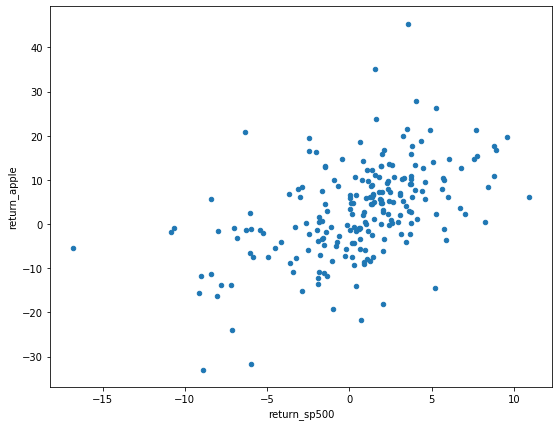

In [51]:
df_returns.plot('return_sp500', 'return_apple', kind='scatter')

The following cells will show you how to perform a simple linear regression. We need the `stats` module from `scipy`.

In [1]:
from scipy import stats

Have a [look at this page](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) which explains how to do a linear regression with `linregress` and apply the information. Take the `returns_sp500` column as the independent variable and the `returns_apple` column as the dependent variable. 

In [58]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_returns['return_sp500'], df_returns['return_apple'])

# Calculate the t-statistic as the slope divided by the standard error
tstat = slope / std_err

print(slope, std_err, tstat)

1.26292269355918 0.15238164401981247 8.287892558732182
